<a href="https://colab.research.google.com/github/ckongara/aer850/blob/main/AER850_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
#Import Commands

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import joblib
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [16]:
#Dataframe Initialization
csv_file = 'Project 1 Data.csv'
df = pd.read_csv(csv_file)
df = df.replace(0, -1) #prevents error when running regression models that would be caused by Not a Number (NaN) values, which having values of 0 will trigger
df = df.dropna()
df = df.reset_index(drop=True)
train_y = df['Step']
train_X = df.drop(columns = ["Step"])

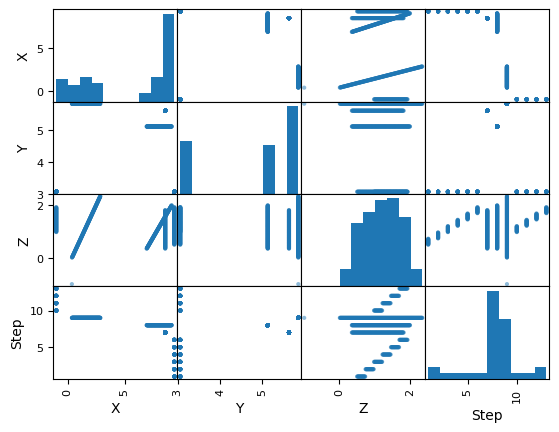

In [17]:
#Data Visualization
attributes = ["X", "Y", "Z","Step"]
pd.plotting.scatter_matrix(df[attributes])
plt.savefig("/content/AER850 Proj1 Plots/DataVis.png")
plt.show()

             X         Y         Z      Step
X     1.000000 -0.089589  0.002011 -0.760428
Y    -0.089589  1.000000 -0.134655  0.292810
Z     0.002011 -0.134655  1.000000  0.196963
Step -0.760428  0.292810  0.196963  1.000000


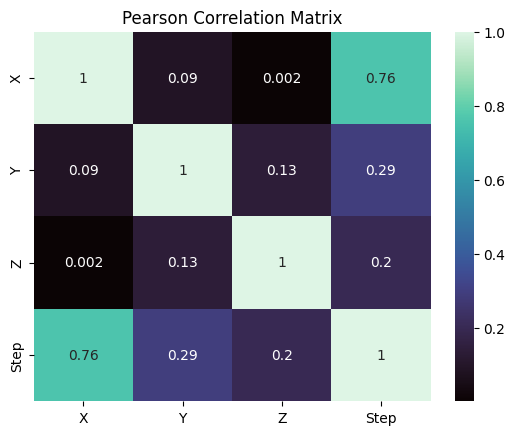

X correlation with Step is:  -0.76
Y correlation with Step is:  0.29
Z correlation with Step is:  0.19696293459640557


In [18]:
#Pearson Correlation Matrix
correlation_matrix = df.corr()
print(correlation_matrix)
plt.title('Pearson Correlation Matrix')
sns.heatmap(np.abs(correlation_matrix), annot=True, cmap="mako")
plt.savefig("/content/AER850 Proj1 Plots/Pearson Correlation Matrix.png")
plt.show()
corr1 = np.corrcoef(df['X'], df['Step'])
print("X correlation with Step is: ", round(corr1[0,1],2))
corr1 = np.corrcoef(df['Y'], df['Step'])
print("Y correlation with Step is: ", round(corr1[0,1],2))
corr1 = np.corrcoef(df['Z'], df['Step'])
print("Z correlation with Step is: ", corr1[0,1])

In [19]:
#Linear Regression
model1 = LinearRegression()
model1.fit(train_X, train_y)

linear_prediction = model1.predict(train_X)
from sklearn.metrics import mean_absolute_error
model1_train_mae = mean_absolute_error(linear_prediction, train_y)
print("The linear regression model Mean Absolute Error (MAE) is: ", round(model1_train_mae,2))

The linear regression model Mean Absolute Error (MAE) is:  1.15


In [20]:
#Decision Tree Regressor
model2= DecisionTreeRegressor()
# model2 = DecisionTreeRegressor(criterion='absolute_error', max_depth=10, max_features='log2', max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=4, min_samples_split=5)
model2.fit(train_X, train_y)
decision_tree_prediction = model2.predict(train_X)
model2_train_mae = mean_absolute_error(decision_tree_prediction, train_y)
print("The decision tree regression model Mean Absolute Error (MAE) is: ", round(model2_train_mae,2))

The decision tree regression model Mean Absolute Error (MAE) is:  0.0


In [21]:
#Random Forest Regressor
model3 = RandomForestRegressor(n_estimators=10, random_state=16) #Pre Grid Search
# model3 = RandomForestRegressor(max_depth = None, max_features = 'sqrt', min_samples_leaf= 1, min_samples_split= 10, n_estimators=30, random_state=16)
model3.fit(train_X, train_y)
random_forest_prediction = model3.predict(train_X)
model3_train_mae = mean_absolute_error(random_forest_prediction, train_y)
print("The random forest regression model Mean Absolute Error (MAE) is: ", round(model3_train_mae,2))

The random forest regression model Mean Absolute Error (MAE) is:  0.0


In [22]:
#Cross Validation - k-fold
#k-fold Cross-Validation (Linear Regression)
scores_model1 = cross_val_score(model1, train_X, train_y, cv=5, scoring='neg_mean_absolute_error')
mae_model1 = -scores_model1.mean()
print("The Grid Search CV Mean Absolute Error (MAE) for the linear regression is: ", round(mae_model1, 2))

#k-fold Cross-Validation (Decision Tree)
scores_model2 = cross_val_score(model2, train_X, train_y, cv=5, scoring='neg_mean_absolute_error')
mae_model2 = -scores_model2.mean()
print("The Grid Search CV Mean Absolute Error (MAE) for the decision tree regression is: ", round(mae_model2, 2))

#k-fold Cross-Validation (Random Forest)
scores_model3 = cross_val_score(model3, train_X, train_y, cv=5, scoring='neg_mean_absolute_error')
mae_model3 = -scores_model3.mean()
print("The Grid Search CV Mean Absolute Error (MAE) for the random forest regression is: ", round(mae_model3, 2))

The Grid Search CV Mean Absolute Error (MAE) for the linear regression is:  2.64
The Grid Search CV Mean Absolute Error (MAE) for the decision tree regression is:  1.8
The Grid Search CV Mean Absolute Error (MAE) for the random forest regression is:  1.78


In [23]:
#Cross Validation - Grid Search Cross Validation
#GridSearchCV (Linear Regression)
param_grid = {
    'fit_intercept': [True, False]
}
grid_search = GridSearchCV(model1, param_grid={}, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(train_X, train_y)
best_params = grid_search.best_params_
print("Ideal Hyperparameters for Linear Regression: ", best_params)

#GridSearchCV (Decision Tree)
param_grid = {
    'criterion': ['friedman_mse', 'poisson', 'absolute_error', 'squared_error'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['log2', 'sqrt'],
    'max_leaf_nodes': [None, 10, 20, 30],
    'min_impurity_decrease': [0.0, 0.01, 0.1]
}
grid_search = GridSearchCV(model2, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(train_X, train_y)
best_params = grid_search.best_params_
print("Ideal Hyperparameters for Decision Tree Regression: ", best_params)
best_model2 = grid_search.best_estimator_

#GridSearchCV (Random Forest)
param_grid = {
    'n_estimators': [10, 30, 50],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}
grid_search = GridSearchCV(model3, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(train_X, train_y)
best_params = grid_search.best_params_
print("Ideal Hyperparameters for Random Forest Regression: ", best_params)
best_model3 = grid_search.best_estimator_

train_y = pd.DataFrame(train_y).iloc[:, 0]
linear_prediction = pd.DataFrame(linear_prediction).astype(int).iloc[:, 0]
decision_tree_prediction = pd.DataFrame(decision_tree_prediction).astype(int).iloc[:, 0]
random_forest_prediction = pd.DataFrame(random_forest_prediction).astype(int).iloc[:, 0]

Ideal Hyperparameters for Linear Regression:  {}
Ideal Hyperparameters for Decision Tree Regression:  {'criterion': 'squared_error', 'max_depth': 30, 'max_features': 'log2', 'max_leaf_nodes': 10, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 5}
Ideal Hyperparameters for Random Forest Regression:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 30}


Linear regression accuracy:  0.21
Linear regression precision:  0.32
Linear regression F1 score:  0.24


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


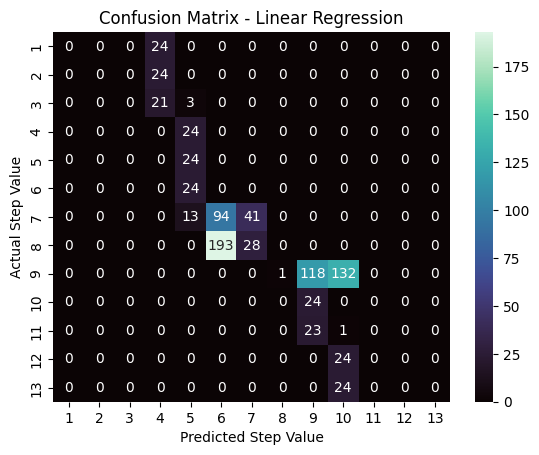

Decision tree regression accuracy:  1.0
Decision tree regression precision:  1.0
Decision tree regression F1 score:  1.0


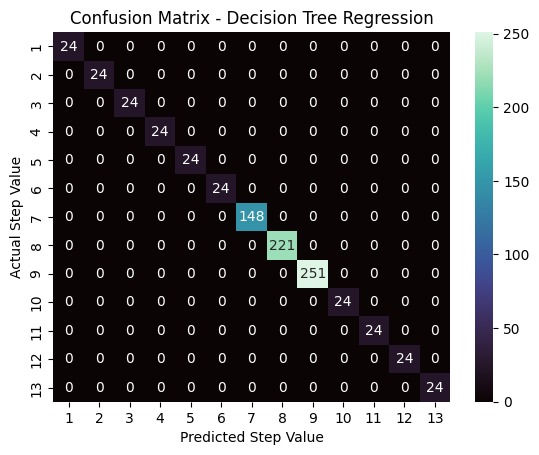

The accuracy score for Model 3 is:  0.9837209302325581
The precision score for Model 3 is:  0.9844925132164769
The F1 score for Model 3 is:  0.9836936021660347


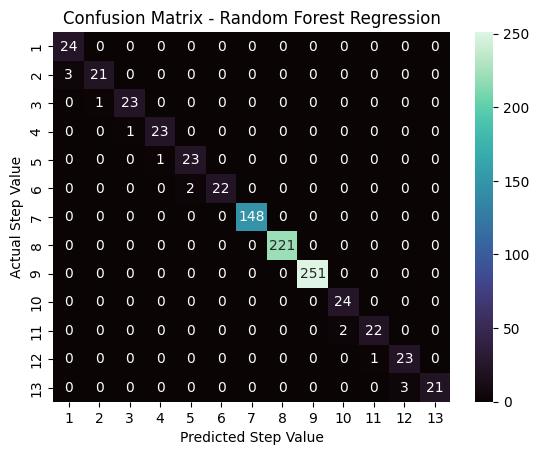

In [24]:
#Performance Analysis

#Model 1 - Linear Regression
#Scores for Linear Regression
accuracy_linear = accuracy_score(train_y, linear_prediction)
precision_linear = precision_score(train_y, linear_prediction, average= 'weighted')
f1_linear = f1_score(train_y, linear_prediction, average= 'weighted')
print("Linear regression accuracy: ",round(accuracy_linear,2) )
print("Linear regression precision: ",round(precision_linear,2) )
print("Linear regression F1 score: ",round(f1_linear,2) )

#Confusion Matrix for Linear Regression
cm_linear = confusion_matrix(train_y, linear_prediction)
class_labels = [str(i) for i in range(1, 14)]
sns.heatmap(cm_linear, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap="mako")
plt.title('Confusion Matrix - Linear Regression')
plt.xlabel('Predicted Step Value')
plt.ylabel('Actual Step Value')
plt.savefig("/content/AER850 Proj1 Plots/Confusion Matrix - Linear Regression.png")
plt.show()

#Model 2 - Decision Tree
#Scores for Decision Tree
accuracy_decision_tree = accuracy_score(train_y, decision_tree_prediction)
precision_decision_tree = precision_score(train_y, decision_tree_prediction, average= 'weighted')
f1_decision_tree = f1_score(train_y, decision_tree_prediction, average= 'weighted')
print("Decision tree regression accuracy: ",round(accuracy_decision_tree,2))
print("Decision tree regression precision: ",round(precision_decision_tree,2))
print("Decision tree regression F1 score: ",round(f1_decision_tree,2))

#Confusion Matrix for Decision Tree
cm_decision_tree = confusion_matrix(train_y, decision_tree_prediction)
class_labels = [str(i) for i in range(1, 14)]
sns.heatmap(cm_decision_tree, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap="mako")
plt.title('Confusion Matrix - Decision Tree Regression')
plt.xlabel('Predicted Step Value')
plt.ylabel('Actual Step Value')
plt.savefig("/content/AER850 Proj1 Plots/Confusion Matrix - Decision Tree Regression")
plt.show()

#Model 3 - Random Forest
#Scores for Random Forest
accuracy_random_forest = accuracy_score(train_y, random_forest_prediction)
precision_random_forest = precision_score(train_y, random_forest_prediction, average= 'weighted')
f1_random_forest = f1_score(train_y, random_forest_prediction, average= 'weighted')
print("The accuracy score for Model 3 is: ",accuracy_random_forest)
print("The precision score for Model 3 is: ",precision_random_forest)
print("The F1 score for Model 3 is: ",f1_random_forest)

#Confusion Matrix for Random Forest
cm_random_forest = confusion_matrix(train_y, random_forest_prediction)
class_labels = [str(i) for i in range(1, 14)]
sns.heatmap(cm_random_forest, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap="mako")
plt.title('Confusion Matrix - Random Forest Regression')
plt.xlabel('Predicted Step Value')
plt.ylabel('Actual Step Value')
plt.savefig("/content/AER850 Proj1 Plots/Confusion Matrix - Random Forest Regression")
plt.show()

In [26]:
#Joblib
joblib.dump(model2, 'DecisionTreeRegression.joblib')
loaded_model3 = joblib.load('DecisionTreeRegression.joblib')
validation_data = [[9.375,3.0625,1.51], [6.995,5.125,0.3875], [0,3.0625,1.93], [9.4,3,1.8], [9.4,3,1.3]]
predicted_vals = loaded_model3.predict(validation_data)
print('The predicted values are: ', predicted_vals)

The predicted values are:  [5. 8. 8. 6. 4.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
